<a href="https://colab.research.google.com/github/aiahsaniqbal/Instance-Segmentation/blob/main/Houses_instance_Segmentation_Train_Mask_RCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Script By Ahsan Iqbal


In [ ]:
!jupyter nbconvert --to html /content/Python_Script_by_Ahsan_Iqbal.ipynb

[NbConvertApp] Converting notebook /content/Python_Script_by_Ahsan_Iqbal.ipynb to html
[NbConvertApp] Writing 1326888 bytes to /content/Python_Script_by_Ahsan_Iqbal.html
[NbConvertApp] Converting notebook /content/Python_Script_by_Ahsan_Iqbal.ipynb.ipynb to html
[NbConvertApp] Writing 1318464 bytes to /content/Python_Script_by_Ahsan_Iqbal.ipynb.html


**1) Training of Mask_Rcnn**
- Provided the dataset.zip file containing the images
- sample.json file for House annotations in those images
- Model are produced in Mask_RCNN/log/obj/....h5, which can be used to evaluate

**Change the path below**

- Path to dataset images of dataset.zip file, and annotation of houses of sample.json is set below

In [ ]:
#change the following path
images_path = "/content/drive/MyDrive/Softeq/instance_segmentation/dataset.zip"
annotations_path = "/content/drive/MyDrive/Softeq/instance_segmentation/sample_tree.json"


In [ ]:
%tensorflow_version 1.x
!pip install --upgrade h5py==2.10.0
!wget https://pysource.com/extra_files/Mask_RCNN_basic_1.zip
!unzip Mask_RCNN_basic_1.zip
import sys
sys.path.append("/content/Mask_RCNN/mrcnn")
from m_rcnn import *
%matplotlib inline

In [ ]:
!nvidia-smi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
extract_images(os.path.join("/content/",images_path), "/content/dataset")

In [ ]:
dataset_train = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "train")
dataset_val = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "val")
class_number = dataset_train.count_classes()
print('Train: %d' % len(dataset_train.image_ids))
print('Validation: %d' % len(dataset_val.image_ids))
print("Classes: {}".format(class_number))

Annotation json path:  /content/drive/MyDrive/Softeq/instance_segmentation/sample.json
Annotation json path:  /content/drive/MyDrive/Softeq/instance_segmentation/sample.json
Train: 14
Validation: 1
Classes: 1


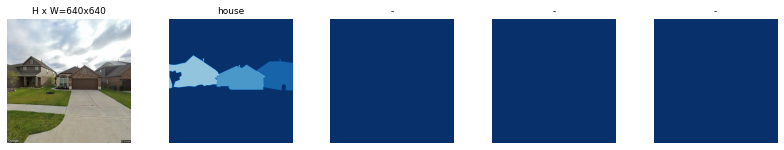

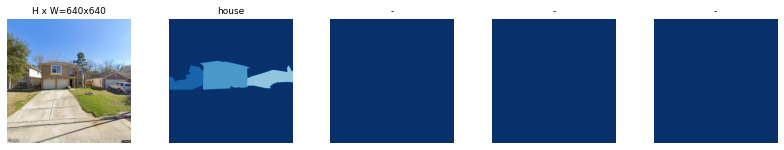

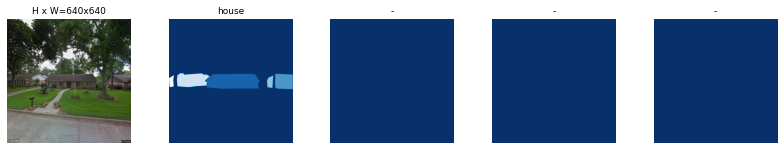

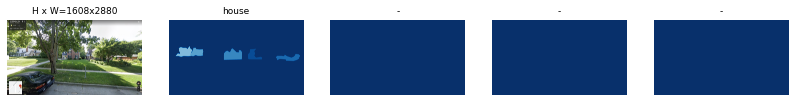

In [ ]:
display_image_samples(dataset_train)

In [ ]:
# Load Configuration
config = CustomConfig(class_number)
#config.display()
model = load_training_model(config)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead
/content/Mask_RCNN/mask_rcnn_coco.h5


In [ ]:
# Start Training
# This operation might take a long time.
train_head(model, dataset_train, dataset_train, config)

**2) Testing on Validation Image**

In [ ]:
test_model, inference_config = load_test_model(class_number)

Loading weights from  /content/Mask_RCNN/logs/object20220211t2338/mask_rcnn_object_0005.h5


original_image           shape: (512, 512, 3)         min:    0.00000  max:  251.00000  uint8
Trained model result
Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  251.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -122.70000  max:  146.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32
Annotation


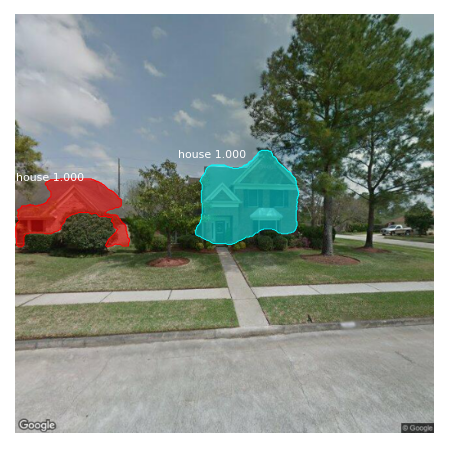

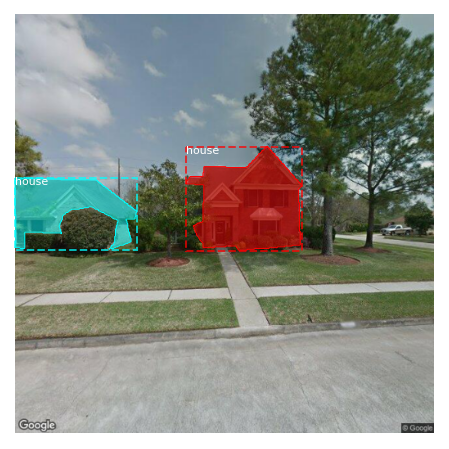

In [ ]:
test_random_image(test_model, dataset_val, inference_config)

**3) Results on Test set**
- Stores the ouput Images to test_output Folder in google_drive
- Load the latest Model in folder log/obj/...

**Change the path below**

- Change the path to your test set (test set image from this location are read for testing)
- change the path to your trained weights_path (pretrained weights are read from this location)
- change the path to your Ouput (output images would be saved to this location)

In [ ]:
t_path="/content/drive/MyDrive/Softeq/instance_segmentation/testset.zip"
trained_weights_path="/content/drive/MyDrive/Softeq/instance_segmentation/logs/object20220211t2338/mask_rcnn_object_0005.h5"

test_output="/content/drive/MyDrive/Softeq/instance_segmentation/test_output/"


In [ ]:
from visualize import random_colors, get_mask_contours, draw_mask
%matplotlib inline

In [ ]:

extract_images(os.path.join("/content/",t_path), "/content/testset")
test_model, inference_config = load_inference_model(1, trained_weights_path)

Extracted: 8 images
Loading weights from  /content/drive/MyDrive/Softeq/instance_segmentation/logs/object20220211t2338/mask_rcnn_object_0005.h5


In [ ]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images
data_testset=0
data_testset=load_images_from_folder("/content/testset")

In [ ]:
from google.colab.patches import cv2_imshow
from PIL import Image 

In [ ]:
value_count_output=0

for img in data_testset:
  value_count_output+=1
  print(value_count_output)
  image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  # Detect results
  r = test_model.detect([image])[0]
  colors = random_colors(80)
  object_count = len(r["class_ids"])
  i=0
  for i in range(object_count):
    # 1. Mask
    mask = r["masks"][:, :, i]
    contours = get_mask_contours(mask)
    for cnt in contours:
        cv2.polylines(img, [cnt], True, colors[i], 2)
        img = draw_mask(img, [cnt], colors[i])
  cv2.imwrite(test_output+str(value_count_output)+'.jpg',img)

1
2
3
4
5
6
7
8


In [ ]:
#path that contains folder you want to copy
%cd /content/Mask_RCNN
%cp -av logs /content/drive/MyDrive/Softeq/instance_segmentation/logs_tree

[Errno 2] No such file or directory: '/content/Mask_RCNN'
/content
cp: cannot stat 'logs': No such file or directory
